# Calculating the Radius from transit depth

You Belong With Me
****

Importing Modules

In [4]:
import astropy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [69]:
%matplotlib notebook
deg = 180/np.pi

In [13]:
def ScreamExtractor(File):
    FILENAME = pd.read_csv(f'{File}.csv', sep=',', comment='#')
    return FILENAME

In [14]:
Directory = 'C:/Users/georg/Documents/GitHub/Iwan-and-George-Year-4-Project/Exoplanets/Sorted Data'
PlanetFile = 'Planets/469 Exoplanets'
StarFile = 'Stars/Gaia All Stars'
PlanetData = ScreamExtractor(f'{Directory}/{PlanetFile}')
StarData = ScreamExtractor(f'{Directory}/{StarFile}')

In [15]:
Source = StarData['Gaia DR3 ID']
SourceID = []
for t in Source:
    SourceID.append(f'Gaia DR2 {t}')

In [16]:
OrbitalPeriod = PlanetData['pl_orbper'] #Days
TransitDepth = PlanetData['pl_trandep'] #%
StellarRadius = StarData['Radius'] #Solar Radius

In [17]:
PlanetID = PlanetData['gaia_id']
PlanetRadius = []
OrbitalPeriodList = []
for n in range(len(TransitDepth)):
    if PlanetID[n] in SourceID:
        StarIndex = SourceID.index(PlanetID[n])
        OrbitalPeriodList.append(OrbitalPeriod[n])
        PlanetRadius.append(np.sqrt(TransitDepth[n]/100)*StellarRadius[StarIndex]*const.R_sun/const.R_earth)

In [18]:
OP = []
PR = []
for i in range(len(PlanetRadius)):
    if PlanetRadius[i] < 3 and PlanetRadius[i] > 1:
        PR.append(PlanetRadius[i])
        OP.append(OrbitalPeriodList[i])

In [43]:
def Identifying_Delta_nu(Data):
    Deltanu = 3    # Starting value for iteration.
    x, y, deltat = fft(BinsOld(Deltanu, *Data))    # Performing the Fourier Transform on the binned data.
    X = list(x.copy())
    Y = list(y.copy())
    while True:
        Index = np.argmax(Y[:len(Y)//2])
        if Index < 10:
            X.remove(X[Index])
            Y.remove(Y[Index])
        else:
            break
    Δν = 2/X[Index]
    
    plt.figure()
    plt.plot(x, y)
    plt.title('Fourier\'s X-Wings')
    plt.xlabel('Frequency of Frequency')
    plt.ylabel('Fractional amplitude')
    plt.show()
    
    return Δν

In [42]:
# Connor Adam code.
def fft(Data):
    data = Data[1]    # Power
    Frequency = Data[0]
    Mean = np.mean(data)
    N = len(Frequency)
    Delta_t = Frequency[1] - Frequency[0]
    data_ft = np.abs(np.fft.fft(data-Mean))**2
    freq = np.abs(np.fft.fftfreq(N, Delta_t))    # freq being the frequency of the frequency (time).
    
    return freq, data_ft, Delta_t

In [47]:
X, Y, deltat = fft([OP, PR])

<IPython.core.display.Javascript object>


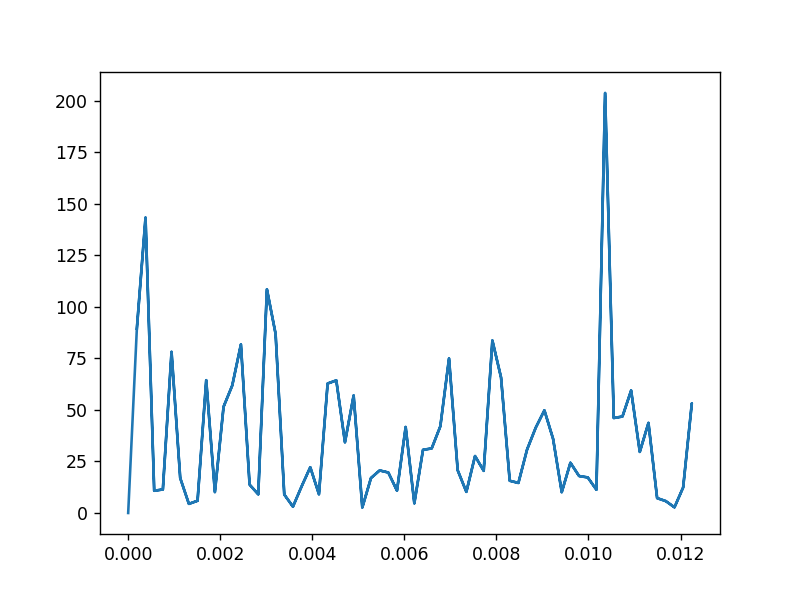

In [48]:
plt.figure()
plt.plot(X, Y)
plt.show()

In [65]:
LogOP = np.log10(OP)
LogPR = np.log10(PR)
Centre = [(max(LogOP)+min(LogOP))/2, (max(LogPR)+min(LogPR))/2]

In [125]:
PointX = [1, 3]
PointY = [2, 4]
Centre = [0, 0]

In [128]:
M = 2
θ = np.abs(np.arctan(M)*deg)
if M < 0:
    θ = 180 - θ
Diff = θ - 90
XList = []
YList = []
for a in range(len(PointX)):
    X = PointX[a]-Centre[0]
    Y = PointY[a]-Centre[1]
    Grad = (X-Centre[0])/(Y-Centre[1])
    Angle = np.abs(np.arctan(Grad)*deg)
    if X < 0 and Y > 0:
        Angle = 180 - Angle
    elif X < 0 and Y < 0:
        Angle = 270 - Angle
    elif X > 0 and Y < 0:
        Angle = 360 - Angle
    NewAngle = Angle - Diff
    Length = np.sqrt((LogOP[a]-Centre[0])**2+(LogPR[a]-Centre[1])**2)
    if NewAngle < 90:
        NewX = Length*np.cos(NewAngle/deg)
        NewY = Length*np.sin(NewAngle/deg)
    elif NewAngle > 90 and NewAngle < 180:
        NewX = -Length*np.cos(180-NewAngle/deg)
        NewY = Length*np.sin(180-NewAngle/deg)
    elif NewAngle > 180 and NewAngle < 270:
        NewX = -Length*np.cos(270-NewAngle/deg)
        NewY = -Length*np.sin(270-NewAngle/deg)
    elif NewAngle > 270 and NewAngle < 360:
        NewX = Length*np.cos(360-NewAngle/deg)
        NewY = -Length*np.sin(360-NewAngle/deg)
    XList.append(NewX)
    YList.append(NewY)

<IPython.core.display.Javascript object>


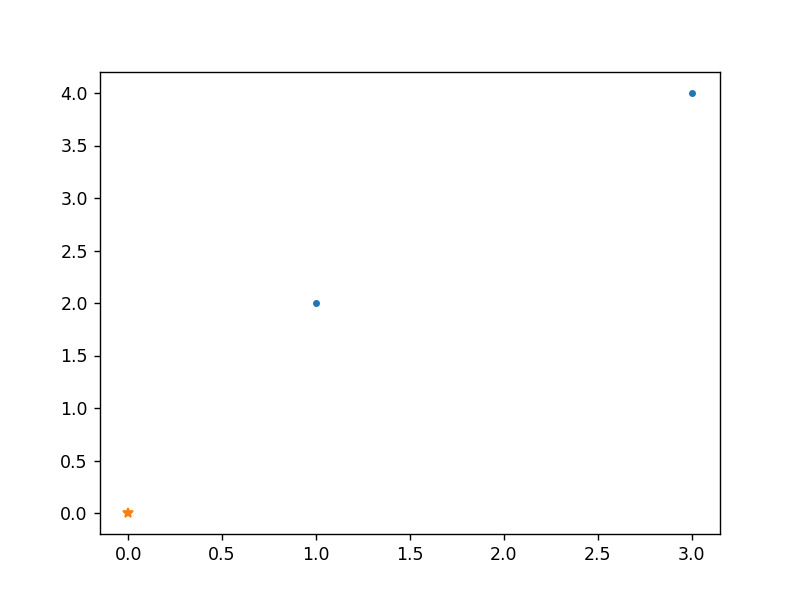

In [126]:
plt.figure()
plt.plot(PointX, PointY, '.')
plt.plot(Centre[0], Centre[1], '*')
plt.show()

<IPython.core.display.Javascript object>


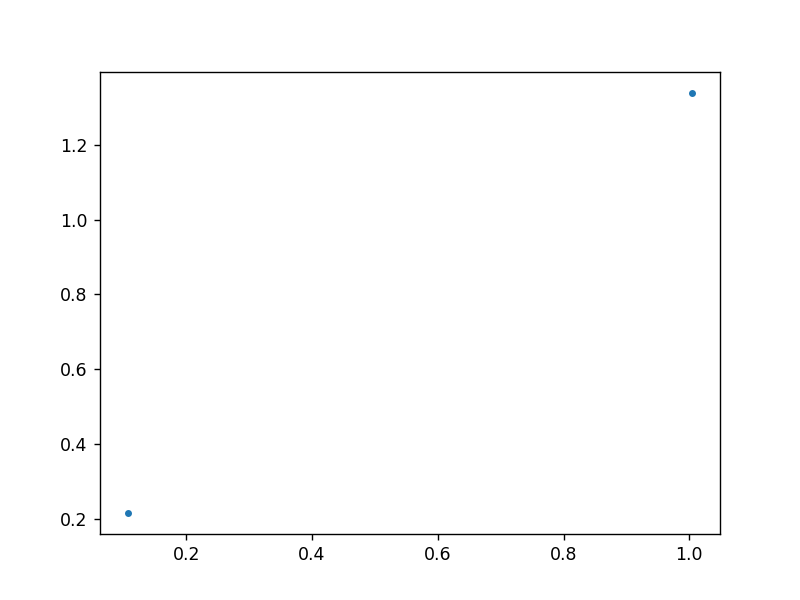

In [129]:
plt.figure()
plt.plot(XList, YList, '.')
plt.show()

<IPython.core.display.Javascript object>


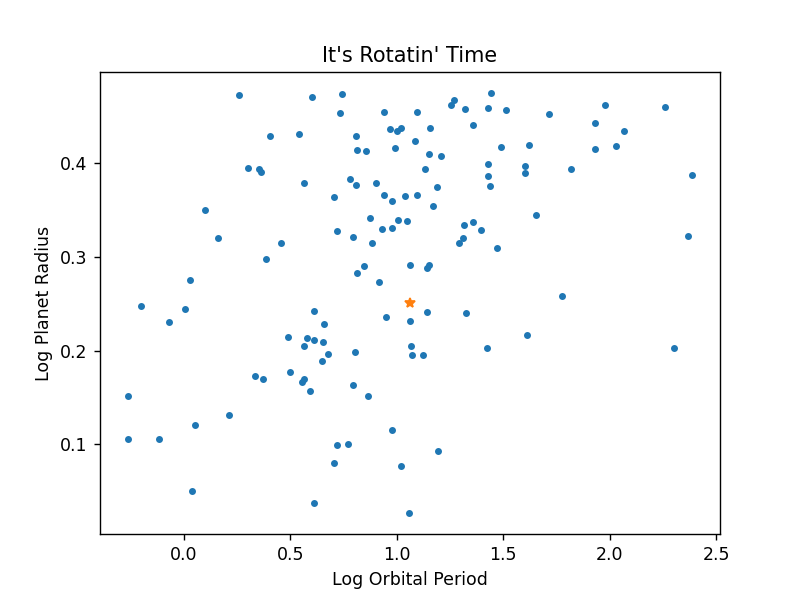

In [67]:
plt.figure()
plt.plot(LogOP, LogPR, '.')
plt.plot(Centre[0], Centre[1], '*')
plt.xlabel('Log Orbital Period')
plt.ylabel('Log Planet Radius')
plt.title('It\'s Rotatin\' Time')
plt.show()

In [38]:
x = np.linspace(min(OP), max(OP), 2)
m1 = -0.11
m2 = -0.23
c1 = 0.37
c2 = 0.33
y1 = 10**(m1*np.log10(x) + c1)
y2 = 10**(m2*np.log10(x) + c2)

<IPython.core.display.Javascript object>


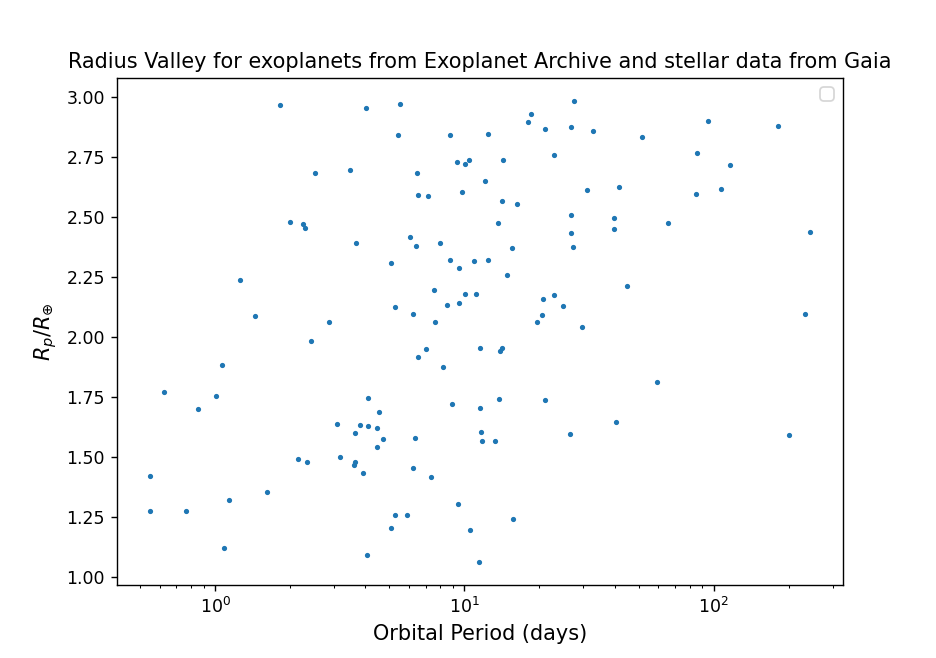

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [41]:
plt.figure()
plt.plot(OP, PR, '.', markersize=4)
'''plt.plot(x, y1, label='Radius Valley (VanHo)')
plt.plot(x, y2, label='Radius Valley (Mine)')
'''
plt.xscale('log')
plt.xlabel('Orbital Period (days)', fontsize=12)
plt.ylabel(r'$R_p/R_{\oplus}$', fontsize=12)
plt.title('Radius Valley for exoplanets from Exoplanet Archive and stellar data from Gaia', fontsize=12)
plt.legend()
plt.show()

You tatty git